# Regresion Lineal: Costo de un incidente de seguridad
En este ejercicio se muestran los fundamentos basicos de la regresion lineal aplicada a un caso de uso sencillo relacionado con la ciberseguridad.}

## Enunciado del ejercicio

El ejercicio consiste en predecir el costo de un incidemte de seguridad en base al número de equipos que se han visto afectados. El conjunto de datos es generado de manera aleatoria

# 1.- Generacion del DataSet

In [1]:
import numpy as np
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

print("La longitud del DataSet es: ", len(X))

La longitud del DataSet es:  100


# 2.- Visualización del DataSet

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

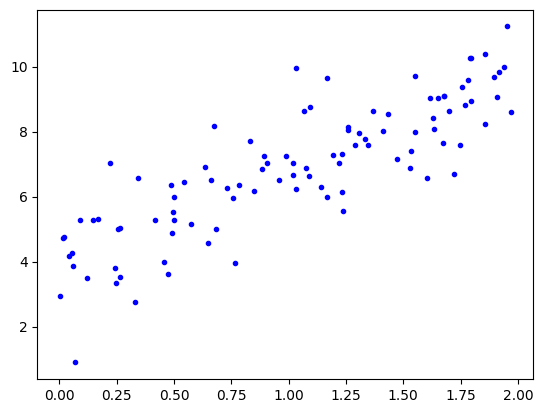

In [3]:
plt.plot(X, y, "b.")
plt.show()

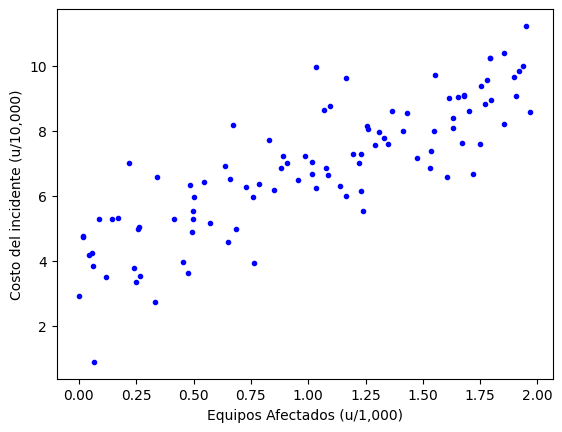

In [4]:
plt.plot(X, y, "b.")
plt.xlabel("Equipos Afectados (u/1,000)")
plt.ylabel("Costo del incidente (u/10,000)")
plt.show()

# Modificación del DataSet

In [5]:
import pandas as pd

In [6]:
data = {'No_Equipos_Afectados': X.flatten(), 'Costo': y.flatten()}
df = pd.DataFrame(data)
df.head(10)

,No_Equipos_Afectados,Costo
0,1.474810,7.157856
1,0.170016,5.311175
2,0.730583,6.269484
3,1.332281,7.781945
4,0.247574,3.342890
5,1.678317,9.099193
6,0.685098,4.999606
7,0.485087,6.347553
8,0.784598,6.368068
9,1.290809,7.575375


In [7]:
# Escalado del Número de equipos afectados
df['No_Equipos_Afectados'] = df['No_Equipos_Afectados'] * 1000
df['No_Equipos_Afectados'] = df['No_Equipos_Afectados'].astype('int')
# Escalado del Costo
df['Costo'] = df['Costo'] * 10000
df['Costo'] = df['Costo'].astype('int')
df.head(10)

,No_Equipos_Afectados,Costo
0,1474,71578
1,170,53111
2,730,62694
3,1332,77819
4,247,33428
5,1678,90991
6,685,49996
7,485,63475
8,784,63680
9,1290,75753


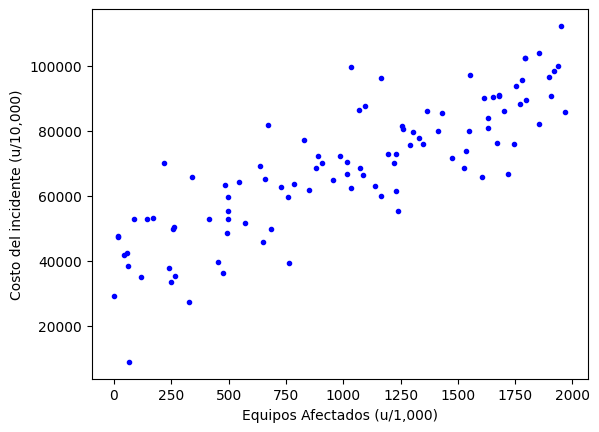

In [8]:
plt.plot(df['No_Equipos_Afectados'], df['Costo'], "b.")
plt.xlabel("Equipos Afectados (u/1,000)")
plt.ylabel("Costo del incidente (u/10,000)")
plt.show()

# 4.- Construccion del Modelo

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
# Construccion del modelo y ajuste de la función de hipotesis
lin_reg = LinearRegression()
lin_reg.fit(df['No_Equipos_Afectados'].values.reshape(-1, 1), df['Costo'].values)

LinearRegression()

In [11]:
# Parámetro Tetha 0
lin_reg.intercept_

np.float64(39540.77562533876)

In [12]:
# Parámetro Tetha 1
lin_reg.coef_

array([28.62393331])

In [13]:
# Predicción para el valor maximo, minimo para el conjunto de datos de entrenamiento
X_min_max = np.array([[df['No_Equipos_Afectados'].min()], [df["No_Equipos_Afectados"].max()]])
y_train_pred = lin_reg.predict(X_min_max)

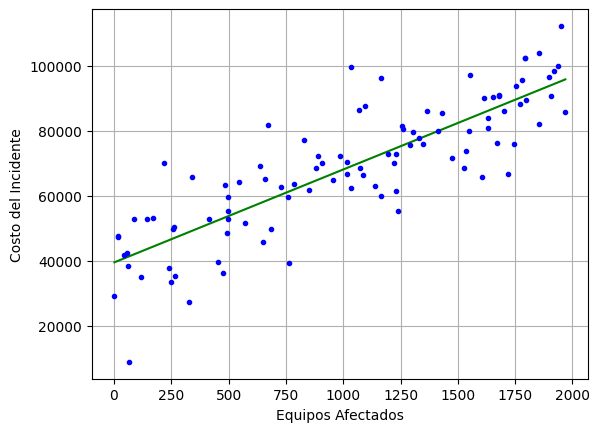

In [14]:
# Representación Grafica de la Función de Hipotesis generada
plt.plot(X_min_max, y_train_pred, "g-")
plt.plot(df['No_Equipos_Afectados'], df['Costo'], "b.")
plt.xlabel("Equipos Afectados")
plt.ylabel("Costo del Incidente")
plt.grid(True)
plt.show()

# 5.- Prediccion de nuevos ejemplos

In [15]:
x_new = np.array([[1300]]) # Numero de equipos afectados.
# Prediccion del costo que tendria el incidente.
Costo = lin_reg.predict(x_new)
print("El costo del incidente seria $", int(Costo[0]))

El costo del incidente seria $ 76751


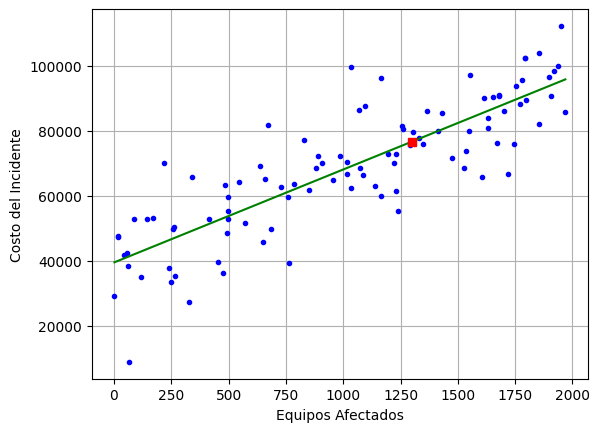

In [16]:
plt.plot(df['No_Equipos_Afectados'], df['Costo'], "b.")
plt.plot(X_min_max, y_train_pred, "g-")
plt.plot(x_new, Costo, "rs")
plt.xlabel("Equipos Afectados")
plt.ylabel("Costo del Incidente")
plt.grid(True)
plt.show()